Import Libraries

In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
from webdriver_manager.chrome import ChromeDriverManager
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
phish_data = pd.read_csv('dataset/phishing_site_urls.csv')

In [3]:
# Show dataset
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,good
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,good
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,good
3,mail.printakid.com/www.online.americanexpress....,good
4,thewhiskeydregs.com/wp-content/themes/widescre...,good


In [4]:
phish_data.tail()

,URL,Label
1648033,23.227.196.215/,bad
1648034,apple-checker.org/,bad
1648035,apple-iclods.org/,bad
1648036,apple-uptoday.org/,bad
1648037,apple-search.info,bad


In [5]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648038 entries, 0 to 1648037
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   URL     1648038 non-null  object
 1   Label   1648038 non-null  object
dtypes: object(2)
memory usage: 25.1+ MB


In [6]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

General Overview
- This data contains 1648038 unique entries
- There are 2 columns (Label and URL)
- Label column contains 2 categories, Good and Bad
- No missing values

In [7]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<Axes: ylabel='Label'>

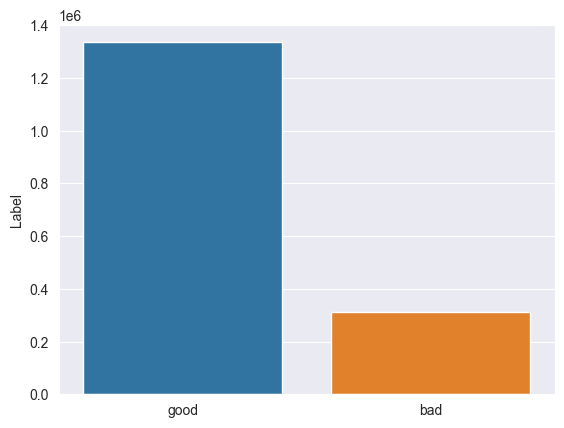

In [48]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index, y=label_counts.Label)

Preprocessing data
- We have gathered the data, now we have to vectorized URLs. 
- I used CountVectorizer and gather words using tokenizer, 
- Since there are words in urls that are more important than just ‘virus’, ‘.exe’ ,’.dat’ etc. 

Lets convert the URLs into a vector form.

RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
# Get first row
phish_data.URL[0] 

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
# Pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
# Tokenized the dataset with keywords
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken', t1,'sec')

Getting words tokenized ...
Time taken 5.940883800001757 sec


In [13]:
phish_data.sample(5)

,URL,Label,text_tokenized
1066818,buendigkeit.southwestadvertisingteam.org/e5i92...,bad,"[buendigkeit, southwestadvertisingteam, org, e..."
802032,uk.eurosport.yahoo.com/football/darren-fletche...,good,"[uk, eurosport, yahoo, com, football, darren, ..."
48084,www.olemiss.edu/depts/general_library/aicpa/,good,"[www, olemiss, edu, depts, general, library, a..."
728639,en.wikipedia.org/wiki/People_named_Ackerman,good,"[en, wikipedia, org, wiki, People, named, Acke..."
73253,www.firstobject.com/dn_sock.htm,good,"[www, firstobject, com, dn, sock, htm]"


SnowballStemmer
- Process the string and get root words

In [14]:
stemmer = SnowballStemmer("english") # choose a language

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 100.27180000000044 sec


In [16]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
601011,store.ergoguys.com/kichcofu.html,good,"[store, ergoguys, com, kichcofu, html]","[store, ergoguy, com, kichcofu, html]"
1054523,cneedu.cn/t1k2wlus,bad,"[cneedu, cn, t, k, wlus]","[cneedu, cn, t, k, wlus]"
191673,gaiaherbs.com/products/detail/17/Cinnamon-Bark-,good,"[gaiaherbs, com, products, detail, Cinnamon, B...","[gaiaherb, com, product, detail, cinnamon, bark]"
5708,www.margao.pt/includes/MYBSN.php,good,"[www, margao, pt, includes, MYBSN, php]","[www, margao, pt, includ, mybsn, php]"
629904,slashdot.org/yro/00/09/21/131208.shtml,good,"[slashdot, org, yro, shtml]","[slashdot, org, yro, shtml]"


In [17]:
# Join text form text_stemmed
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.5158984000008786 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
83904,www.textuality.com/zig/,good,"[www, textuality, com, zig]","[www, textual, com, zig]",www textual com zig
592324,service.confirm.paypal.cmd.cgi.aficion.fr/,bad,"[service, confirm, paypal, cmd, cgi, aficion, fr]","[servic, confirm, paypal, cmd, cgi, aficion, fr]",servic confirm paypal cmd cgi aficion fr
796910,theworldlink.com/,good,"[theworldlink, com]","[theworldlink, com]",theworldlink com
427046,santacruzheritage.org/directory,good,"[santacruzheritage, org, directory]","[santacruzheritag, org, directori]",santacruzheritag org directori
1230986,hinteats.com/dropbox/,bad,"[hinteats, com, dropbox]","[hinteat, com, dropbox]",hinteat com dropbox


Visualization
1. Visualize some important keys using word cloud

In [19]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [20]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
549346,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
549347,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
549348,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
549349,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
549350,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [21]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,good,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,good,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,good,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,good,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,good,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


Create function to visualize important keyword from URL 

In [22]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [23]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

Keywords in Good URLs

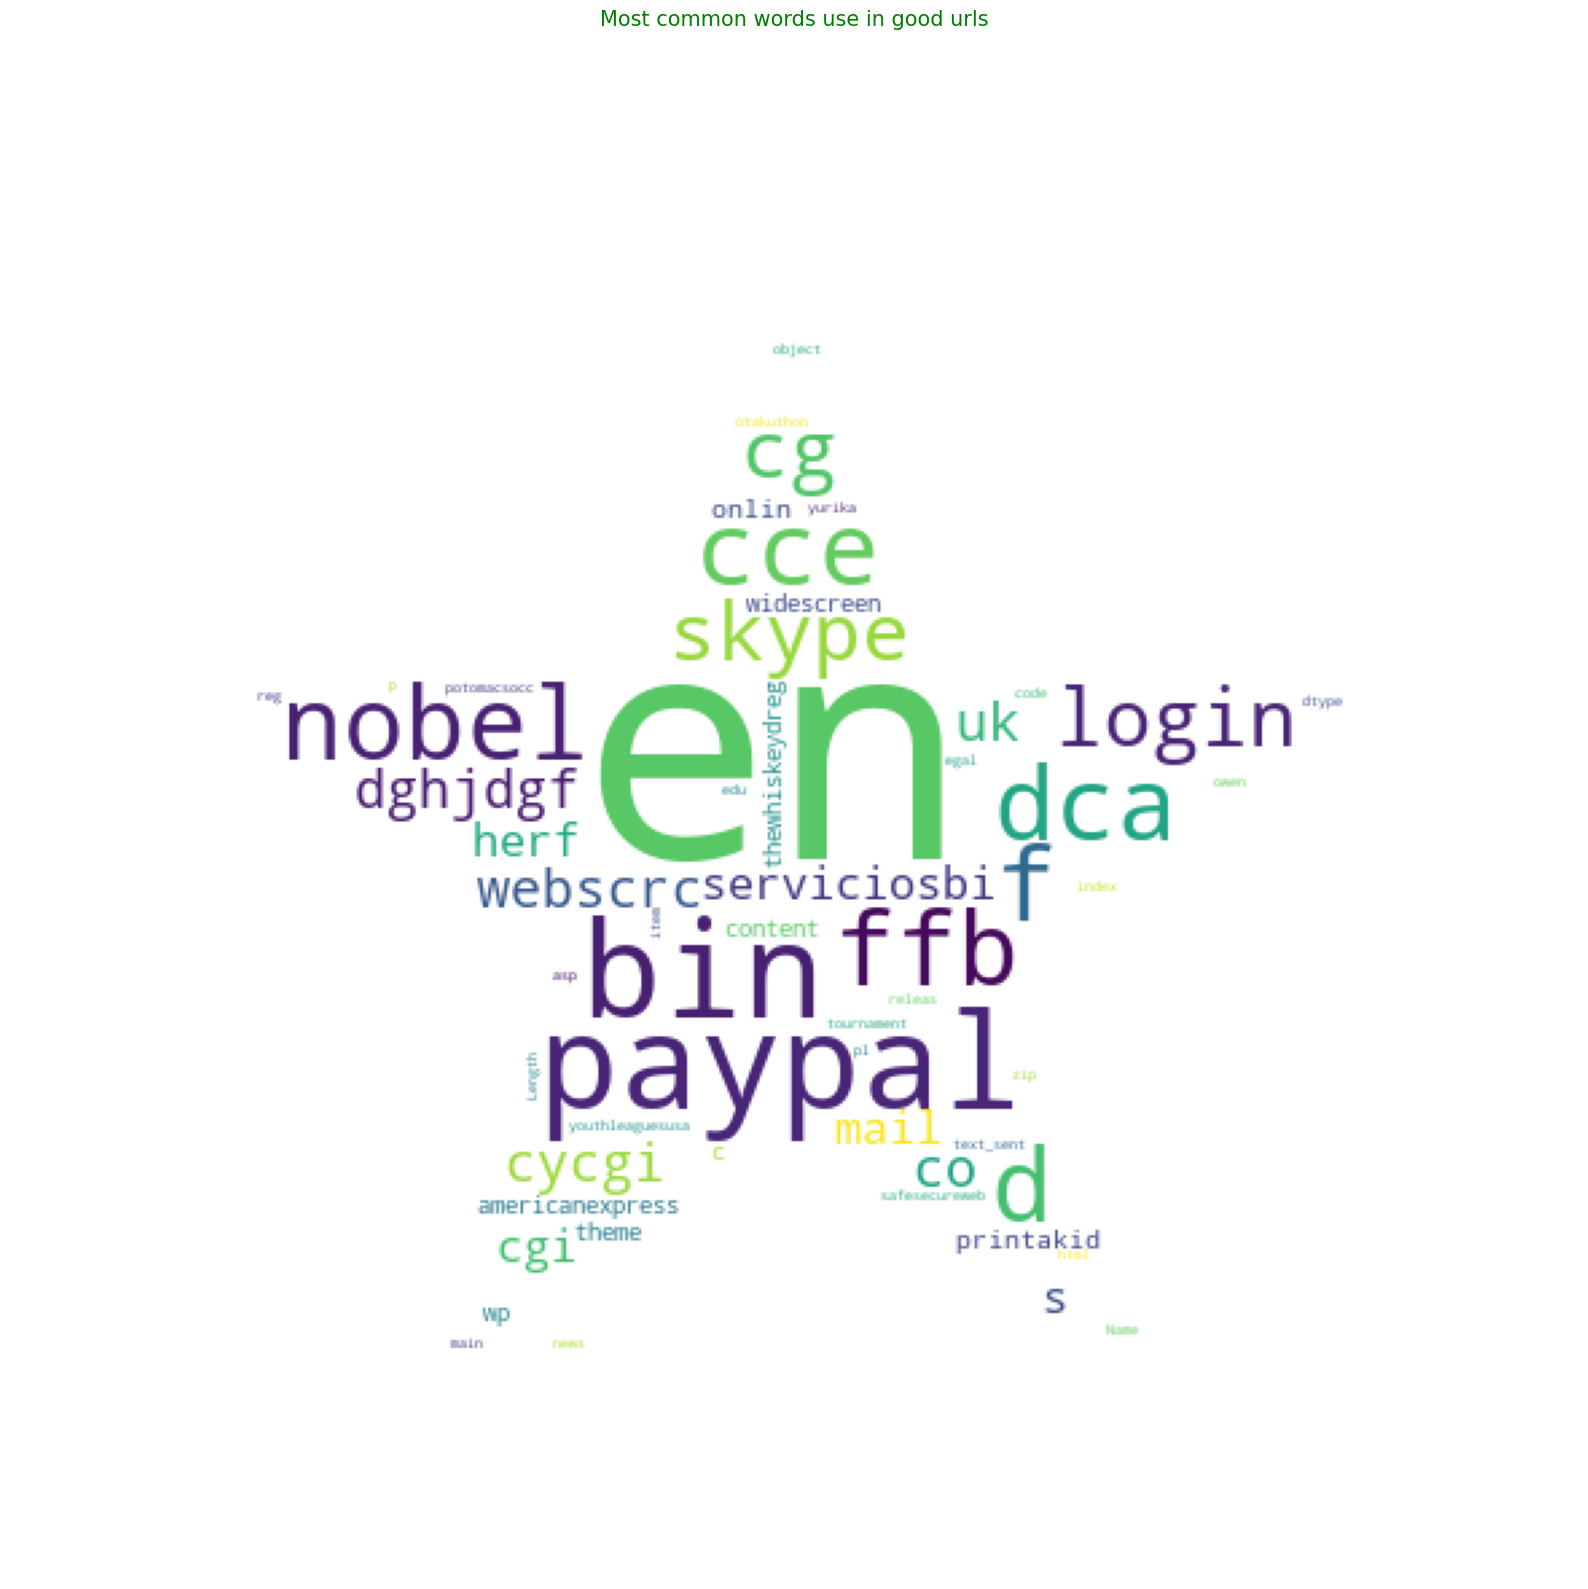

In [24]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

In [25]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

Keywords in bad URLs

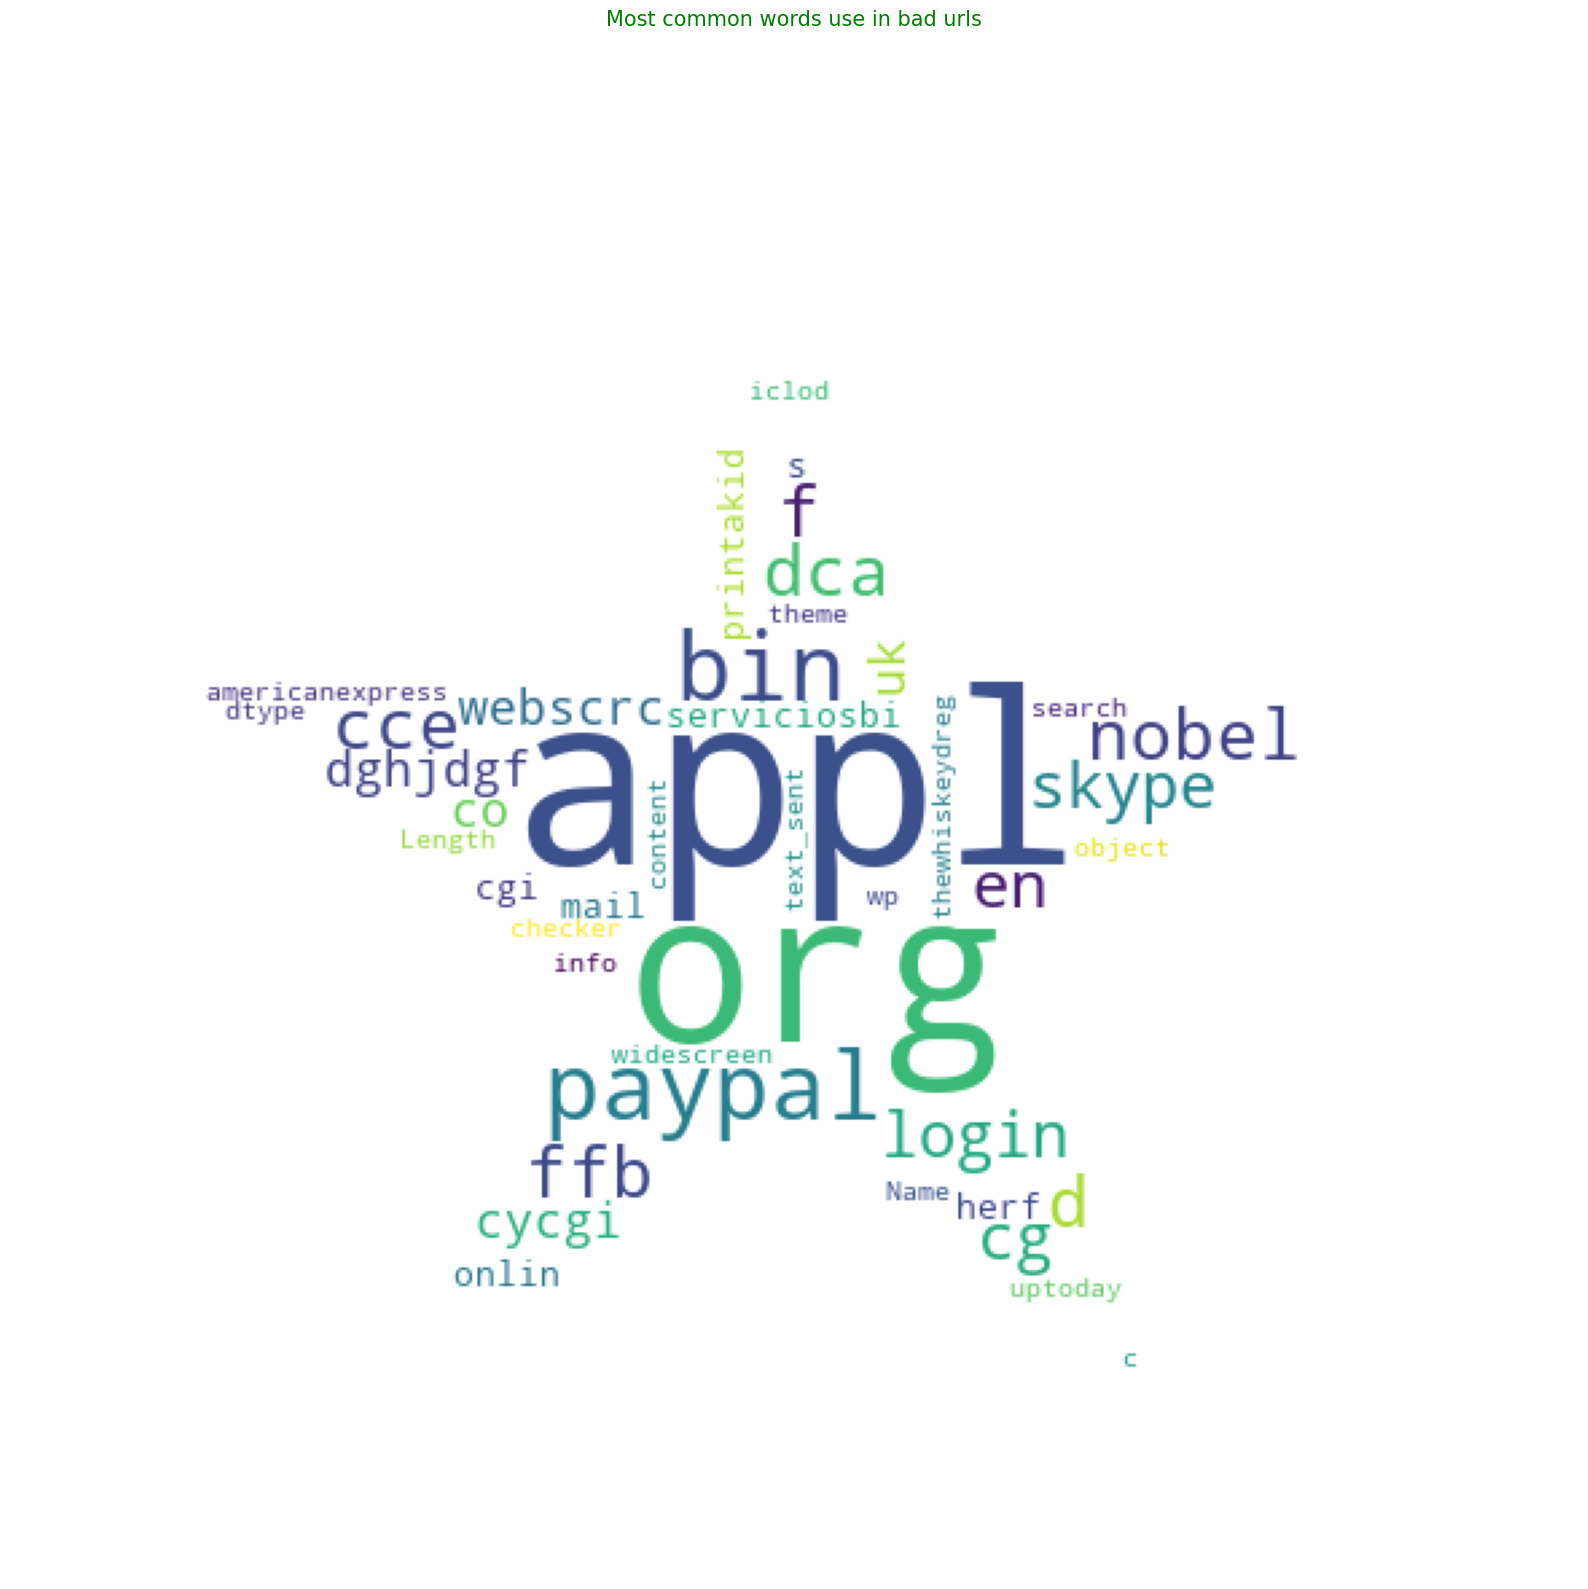

In [26]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

2. Visualize internal links inside the website

Scrap the website
- Use Chrome WebDriver so we can scraoe dynamic web pages

Chrome WebDriver
- WebDriver is used to automate testing of web apps across many browsers. It provides capabilities to navigate web pages, user inputs, and others

In [27]:
browser = webdriver.Chrome()

In [53]:
# here i take phishing sites
list_urls = ['https://stalkforx.ru/#1704522117235281920|KHB|stanislavski09']
links_with_text = []

BeautifulSoup
- Used to get HTML, XML, and other markup languages, especially HTML DOM Tree 

In [54]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [55]:
# Turn URLs into a Datafrane

df = pd.DataFrame(links_with_text, columns=["from", "to"])
df.head()

,from,to
0,https://stalkforx.ru/#1704522117235281920|KHB|...,https://translate.google.com
1,https://stalkforx.ru/#1704522117235281920|KHB|...,https://stalktools.com/
2,https://stalkforx.ru/#1704522117235281920|KHB|...,con.php?type=2&id=stanislavski09
3,https://stalkforx.ru/#1704522117235281920|KHB|...,/sozlesme.php
4,https://stalkforx.ru/#1704522117235281920|KHB|...,/sozlesme.php


Create Model
- Count Vectorizer is used to transform a corpora of text to a vector of term and token counts

In [56]:
#create cv object
cv = CountVectorizer()
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
# Split the data
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [58]:
# create lr object
lr = LogisticRegression()

In [59]:
lr.fit(trainX,trainY)

LogisticRegression()

In [60]:
lr.score(testX,testY)

0.862260624742118

Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best

In [61]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.8741654719795992
Testing Accuracy : 0.862260624742118

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.62      0.65      0.63     74820
        Good       0.92      0.91      0.92    337190

    accuracy                           0.86    412010
   macro avg       0.77      0.78      0.77    412010
weighted avg       0.86      0.86      0.86    412010


CONFUSION MATRIX


<Axes: >

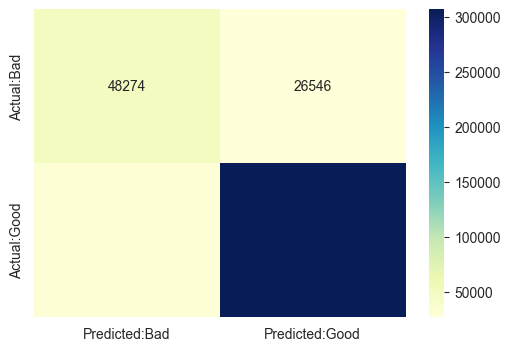

In [62]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [63]:
# create mnb object
mnb = MultinomialNB()

In [64]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [65]:
mnb.score(testX,testY)

0.8844445523166914

 MultinomialNB gives us 95% accuracy

In [66]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.8922500137537337
Testing Accuracy : 0.8844445523166914

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.85      0.65      0.74    103222
        Good       0.89      0.96      0.93    308788

    accuracy                           0.88    412010
   macro avg       0.87      0.81      0.83    412010
weighted avg       0.88      0.88      0.88    412010


CONFUSION MATRIX


<Axes: >

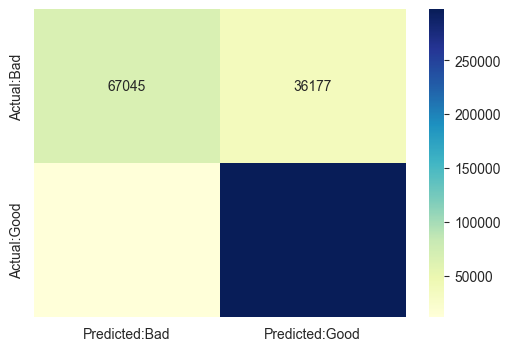

In [67]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<Axes: ylabel='Accuracy'>

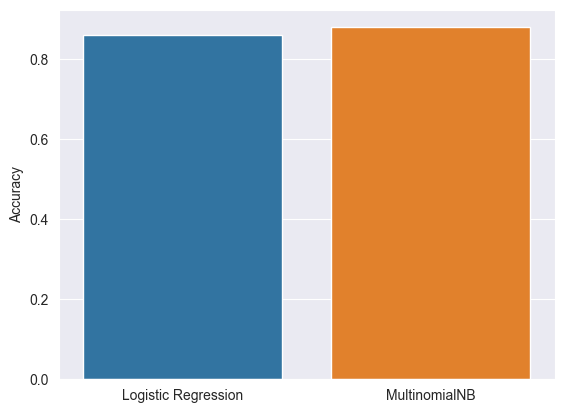

In [68]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

So, MultinomialNB is the best fit model, Now we make sklearn pipeline using Logistic Regression

In [78]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'), MultinomialNB())

In [79]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [80]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('multinomialnb', MultinomialNB())])

In [81]:
pipeline_ls.score(testX,testY) 

0.8843256231644863

Training Accuracy : 0.892458746889229
Testing Accuracy : 0.8843256231644863

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.85      0.65      0.74    101907
        Good       0.89      0.96      0.93    310103

    accuracy                           0.88    412010
   macro avg       0.87      0.81      0.83    412010
weighted avg       0.88      0.88      0.88    412010


CONFUSION MATRIX


<Axes: >

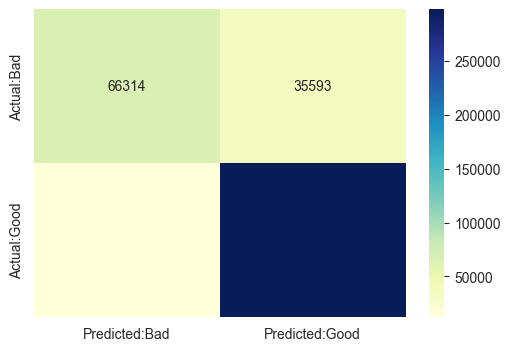

In [82]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [88]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

That’s it. See, it's that simple yet so effective. We get an accuracy of 88%

* Bad links => Phishing sites

* Good links => Not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [95]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php', 'fazan-pacir.rs/temp/libraries/ipad',
               'tubemoviez.exe', 'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt', 'stalkforx.ru']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad' 'bad' 'good']
******************************
['good' 'good' 'good' 'good']
